<a href="https://colab.research.google.com/github/kennyluu130/Heart-Disease-Diagnosis-Prediction-With-Ensemble-Methods/blob/main/HeartDiseaseDiagnosisPredictionWithEnsembleMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Diagnosis Prediction With Ensemble Methods

- Kenny Luu
- UCLA 2027
- Computer Science and Linguistics
- Data Science Engineering

###Imports

In [ ]:
#General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scitkit-learn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

#Utilities
import requests, io


###Dataframe

In [ ]:
#Load dataset from Google Drive
file_url = "https://drive.google.com/file/d/1iPjNvZ87SSvGABGXaTIKp1xBylnWrRqD/view?usp=sharing"
file_id = file_url.split("/")[-2]
url = f"https://drive.google.com/uc?id={file_id}&export=download"

response = requests.get(url)
content = response.content

df = pd.read_csv(io.StringIO(content.decode('utf-8')))
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
#Basic statistics
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

###Data Preprocessing

In [ ]:
#Split features and target
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
#Identify numeric and categorical features
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
binary_cols = ['sex', 'fbs', 'exang']

In [ ]:
#One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

In [ ]:
#Combine features
X_final = pd.concat([X[numeric_cols + binary_cols], X_encoded], axis=1)

In [ ]:
#Scale numeric features
scaler = MinMaxScaler()
X_final[numeric_cols] = scaler.fit_transform(X_final[numeric_cols])

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.33, stratify=y, random_state=12
)

###Visualizations

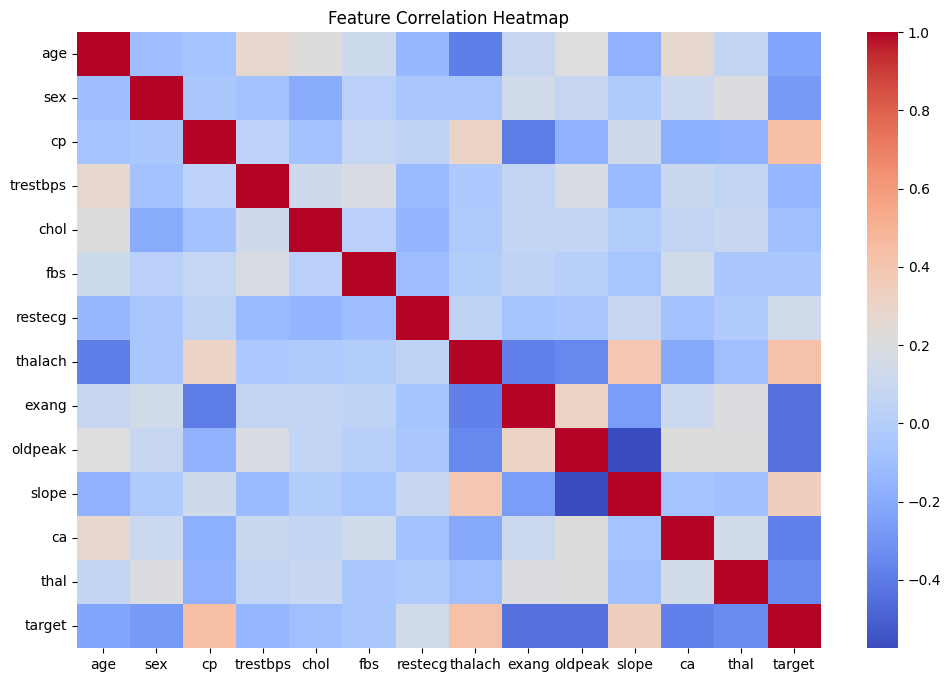

In [ ]:
#Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

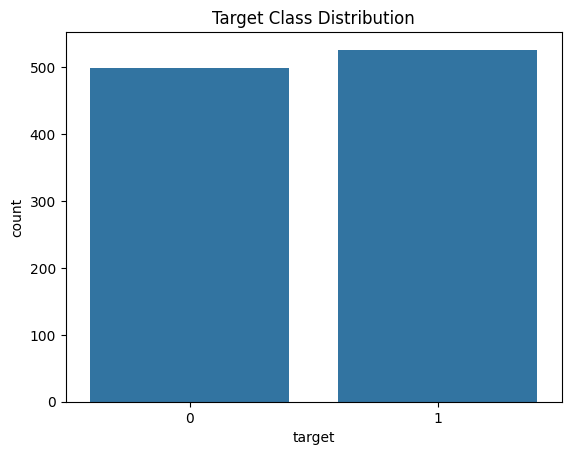

In [ ]:
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.show()

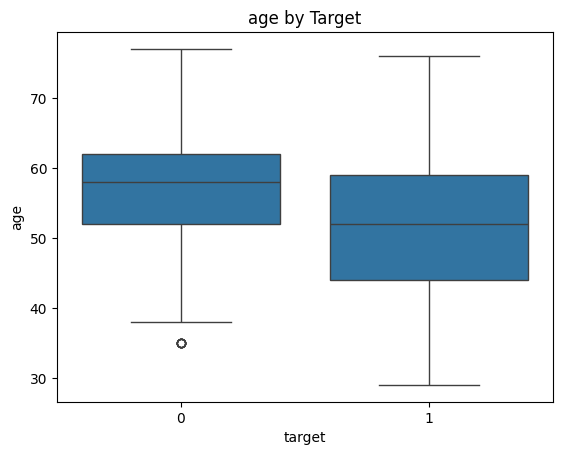

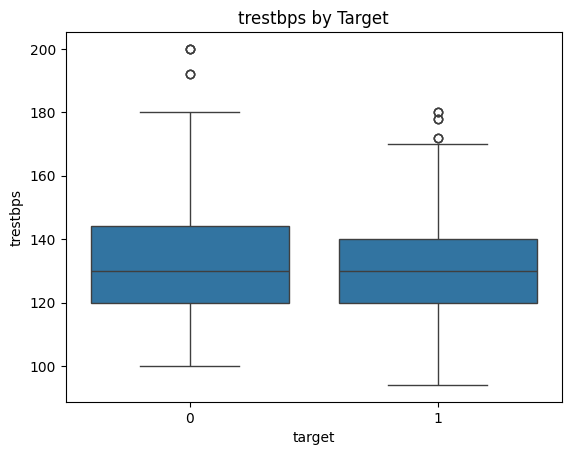

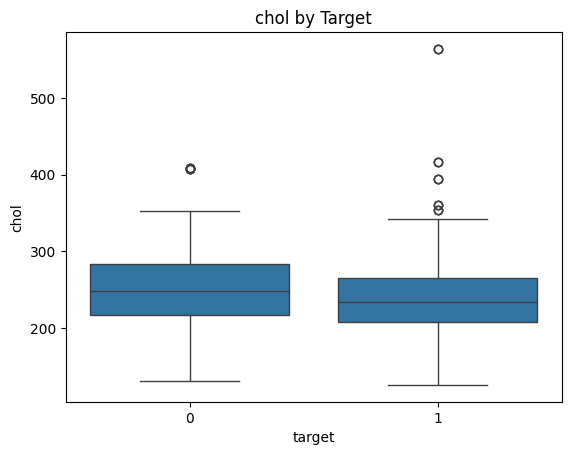

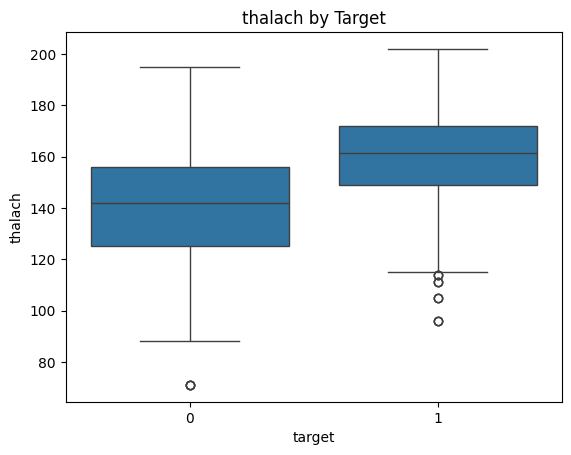

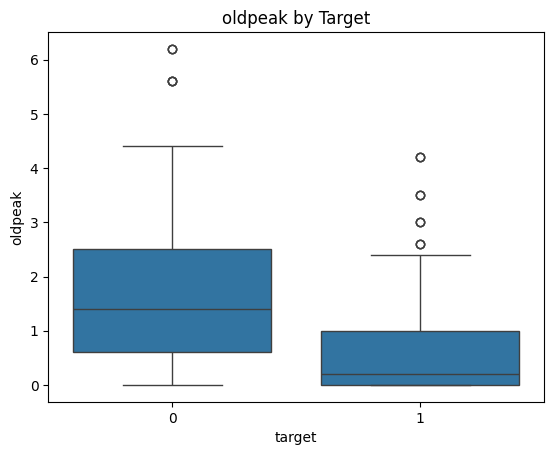

In [ ]:
#Boxplots for numeric features by target
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f"{col} by Target")
    plt.show()

###Model Training and Evaluation

In [ ]:
#Define ensemble models
bagging = BaggingClassifier(n_estimators=50, random_state=12)
random_forest = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=12)
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=12)


In [ ]:
#Fit models
models = {"Bagging": bagging, "Random Forest": random_forest, "AdaBoost": adaboost}


Bagging Metrics:
Confusion Matrix:
[[165   0]
 [  3 171]]
Accuracy: 0.991
Recall (Sensitivity): 0.983
Precision: 1.000
AUC: 0.991


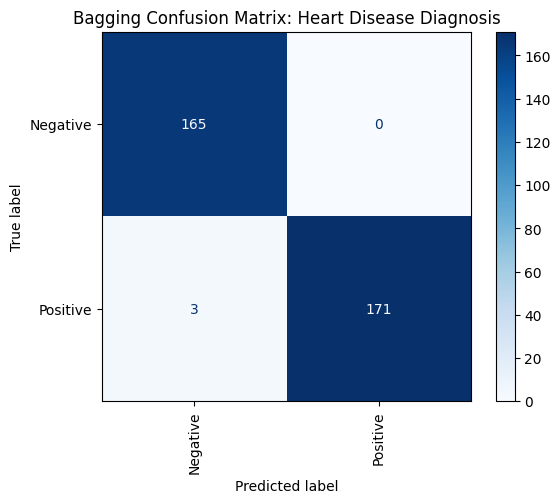


Random Forest Metrics:
Confusion Matrix:
[[165   0]
 [  6 168]]
Accuracy: 0.982
Recall (Sensitivity): 0.966
Precision: 1.000
AUC: 0.983


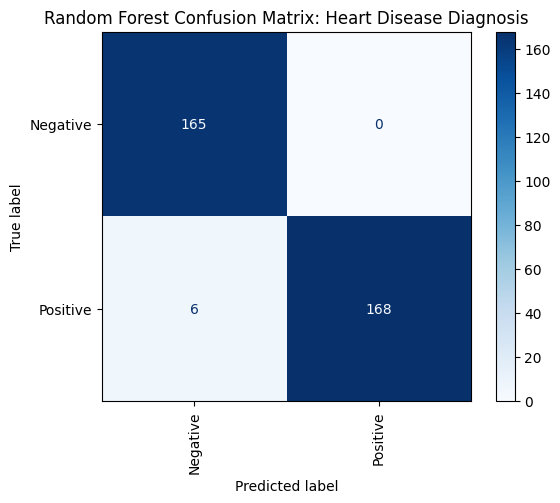


AdaBoost Metrics:
Confusion Matrix:
[[133  32]
 [ 23 151]]
Accuracy: 0.838
Recall (Sensitivity): 0.868
Precision: 0.825
AUC: 0.837


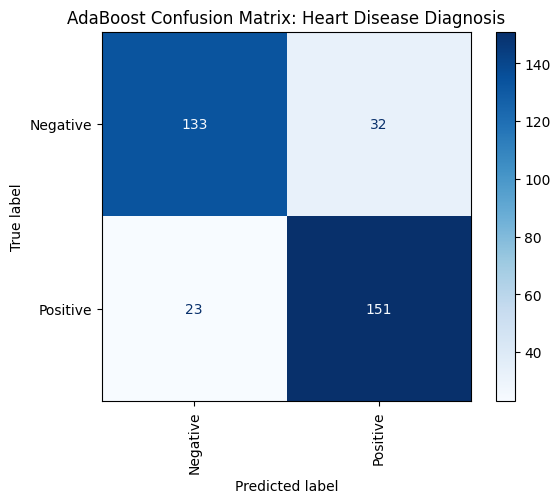

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print(f"\n{name} Metrics:")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {acc:.3f}")
    print(f"Recall (Sensitivity): {recall:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"AUC: {auc:.3f}")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set_xticklabels(disp.ax_.get_xticklabels(), rotation=90)
    plt.title(f"{name} Confusion Matrix: Heart Disease Diagnosis")
    plt.show()

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    cv_scores = cross_val_score(model, X_final, y, cv=skf, scoring='accuracy')
    print(f"{name} 5-Fold CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

Bagging 5-Fold CV Accuracy: 1.000 ± 0.000
Random Forest 5-Fold CV Accuracy: 0.996 ± 0.008
AdaBoost 5-Fold CV Accuracy: 0.878 ± 0.016
